In [46]:
import numpy as np
from scipy.signal import fftconvolve
from scipy.misc import imread
import matplotlib.pyplot as plt
import pywt
%matplotlib inline

## Problem 1

In [47]:
def decompose(X, L, H, n):
    A_i = X.copy()
    D = []
    for i in range(n):
        D = [fftconvolve(A_i,H)[1::2]] + D
        A_i = fftconvolve(A_i,L)[1::2]
    return [A_i] + D

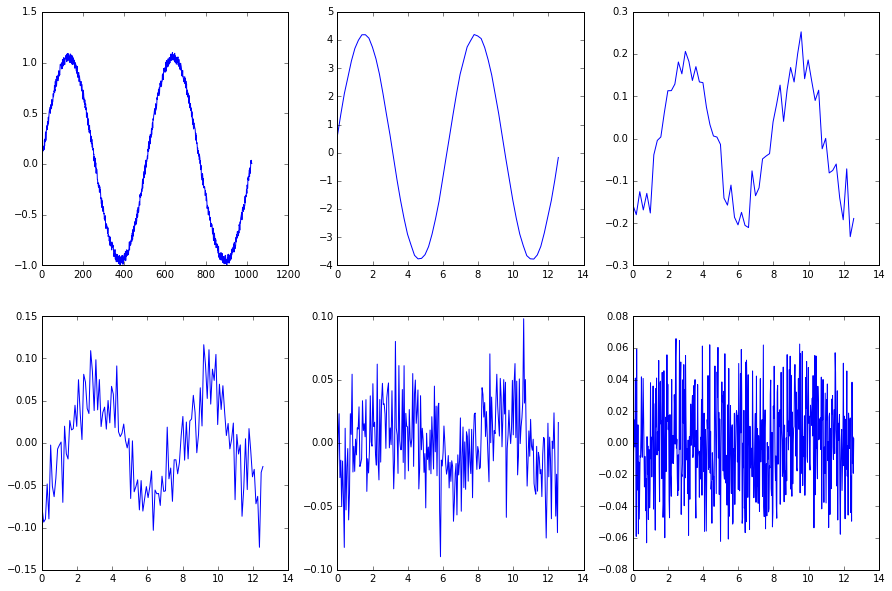

In [78]:
L = np.ones(2)/np.sqrt(2)
H = np.array([-1,1])/np.sqrt(2)

domain = np.linspace(0,4*np.pi,1024)
noise = np.random.random(1024)*0.1
noisysin = np.sin(domain) + noise
coeffs = decompose(noisysin, L, H, 4)

fig, ax = plt.subplots(sharex = True, sharey = True)
fig.set_figwidth(15)
fig.set_figheight(10)

plt.subplot(231)
plt.plot(noisysin)
#plt.tick_params(labelbottom='off')
#plt.ylim(-4.2,4.2)

for i,val in enumerate(coeffs):
    domain = np.linspace(0,4*np.pi, len(val))
    plt.subplot(2,3,i+2)
    plt.plot(domain, val)
    
    if i+2 < 4:
        pass
        #plt.ylim(-4.2,4.2)
        #plt.tick_params(labelbottom='off')
    else:
        pass#plt.ylim(-0.15,0.15)
    if i+2 != 4:
        pass
        #plt.tick_params(labelleft='off')

plt.show()

## Problem 2

In [49]:
def inverse(ar):
    #the inverse of H is -H and the inverse of L is L
    A = ar[0]
    for D_i in ar[1:]:
        up_A = np.zeros(2*A.size)
        up_A[::2] = A
        up_D = np.zeros(2*D_i.size)
        up_D[::2] = D_i
        A = fftconvolve(up_A,L)[:-1] + fftconvolve(up_D, -H)[:-1]
    return A

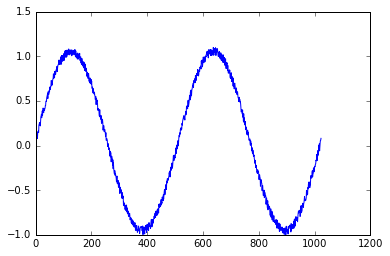

True

In [50]:
noisysin_2 = inverse(coeffs)
plt.plot(noisysin_2)
plt.show()
np.allclose(noisysin,noisysin_2)

## Problem 3

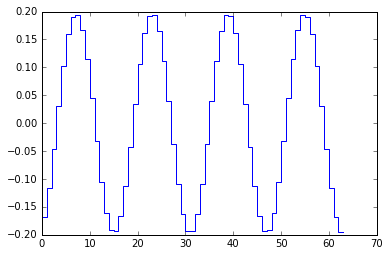

In [51]:
f = np.sin(np.linspace(0,8*np.pi, 256))
fw = pywt.wavedec(f, 'haar')
plt.plot(fw[-2], linestyle='steps')
plt.show()

In [52]:
f_prime = pywt.waverec(fw, 'haar')
np.allclose(f_prime, f)

True

In [53]:
mandrill = imread('mandrill.png', True)
lw = pywt.dwt2(mandrill, 'db4', mode='per')

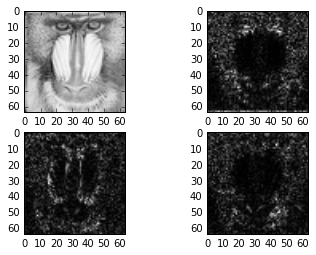

In [54]:
plt.subplot(221)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.subplot(222)
plt.imshow(np.abs(lw[1][0]), cmap='gray')
plt.subplot(223)
plt.imshow(np.abs(lw[1][1]), cmap='gray')
plt.subplot(224)
plt.imshow(np.abs(lw[1][2]), cmap='gray')
plt.show()

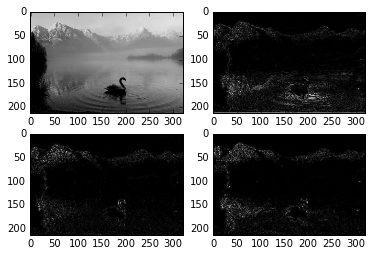

In [55]:
swanlake = imread('swanlake_gray.jpg', True)
lw = pywt.dwt2(swanlake, 'db4', mode='per')
plt.subplot(221)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.subplot(222)
plt.imshow(np.abs(lw[1][0]), cmap='gray')
plt.subplot(223)
plt.imshow(np.abs(lw[1][1]), cmap='gray')
plt.subplot(224)
plt.imshow(np.abs(lw[1][2]), cmap='gray')
plt.show()

## Problem 4

In [56]:
def image_clean(filename):
    image = imread(filename,True)
    wavelet = pywt.Wavelet('haar')
    WaveletCoeffs = pywt.wavedec2(image,wavelet)
    return pywt.waverec2(WaveletCoeffs[:-1], wavelet)

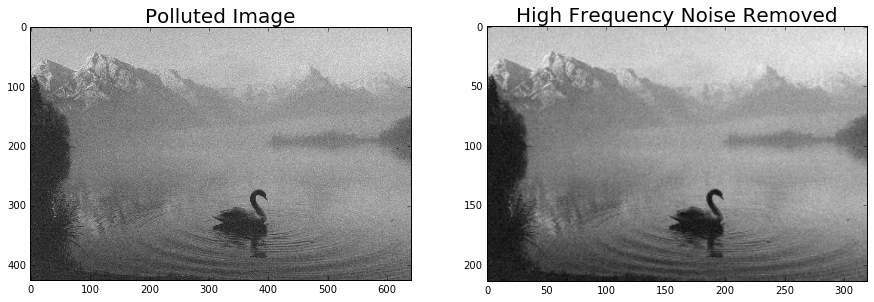

In [57]:
swanlake_polluted = imread('swanlake_polluted.jpg', True)
clean_image = image_clean('swanlake_polluted.jpg')

fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)

plt.subplot(121)
plt.title("Polluted Image", fontsize = 20)
plt.imshow(swanlake_polluted, cmap='gray')

plt.subplot(122)
plt.title("High Frequency Noise Removed", fontsize = 20)
plt.imshow(clean_image, cmap='gray')
plt.show()